In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('weatherHistory.csv')

In [3]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
df2 = df.rename({'Formatted Date': 'DateTime', 'Precip Type': 'PrecipType', "Temperature (C)": "Temp", "Apparent Temperature (C)": "AppTemp", "Wind Speed (km/h)": "WindSpeed", "Wind Bearing (degrees)": "WindBear", "Visibility (km)": "Visibility", "Loud Cover": "CloudCover", "Pressure (millibars)": "Pressure"}, axis=1)

In [5]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
wc=LabelEncoder().fit_transform(df2['PrecipType'])

In [7]:
df2.PrecipType=wc

In [8]:
ab=df2.PrecipType
np.unique(ab[1564])

array([1])

In [9]:
ab=df["Precip Type"]
np.unique(ab[1564])

array(['snow'], dtype='<U4')

In [10]:
x=df2.drop(["Daily Summary", 'Summary'],axis = 1)

y = df2['Daily Summary']

In [11]:
x.shape

(96453, 10)

In [12]:
x["date"] = ""
x["time"] = ""
x["year"] = ""
x["month"] = ""
x["day"] = ""
x["hour"] = ""
x["minute"] = ""

In [13]:
for a in range(96453):
    x.DateTime[a]=x.DateTime[a].split(' ')
    x.DateTime[a].pop(2)
    x.time[a]=x.DateTime[a].pop(1)
    x.date[a]=x.DateTime[a].pop(0)
    
    x.time[a]=x.time[a].split('.')
    x.time[a]=x.time[a].pop(0)
    
    x.date[a]=x.date[a].split('-')
    x.day[a]=int(x.date[a].pop(2))
    x.month[a]=int(x.date[a].pop(1))
    x.year[a]=int(x.date[a].pop(0))
    
    x.time[a]=x.time[a].split(':')
    x.minute[a]=int(x.time[a].pop(1))
    x.hour[a]=int(x.time[a].pop(0))
    

<ipython-input-13-31fcaad791ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.DateTime[a]=x.DateTime[a].split(' ')
<ipython-input-13-31fcaad791ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.time[a]=x.DateTime[a].pop(1)
<ipython-input-13-31fcaad791ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.date[a]=x.DateTime[a].pop(0)
<ipython-input-13-31fcaad791ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a co

In [14]:
x=x.drop(["DateTime", "date", "time"], axis=1)

In [15]:
x.tail()

,PrecipType,Temp,AppTemp,Humidity,WindSpeed,WindBear,Visibility,CloudCover,Pressure,year,month,day,hour,minute
96448,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,2016,9,9,19,0
96449,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,2016,9,9,20,0
96450,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,2016,9,9,21,0
96451,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,2016,9,9,22,0
96452,0,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,2016,9,9,23,0


In [16]:
x.dropna()
y.dropna()

0             Partly cloudy throughout the day.
1             Partly cloudy throughout the day.
2             Partly cloudy throughout the day.
3             Partly cloudy throughout the day.
4             Partly cloudy throughout the day.
                          ...                  
96448    Partly cloudy starting in the morning.
96449    Partly cloudy starting in the morning.
96450    Partly cloudy starting in the morning.
96451    Partly cloudy starting in the morning.
96452    Partly cloudy starting in the morning.
Name: Daily Summary, Length: 96453, dtype: object

In [17]:
x.head()

,PrecipType,Temp,AppTemp,Humidity,WindSpeed,WindBear,Visibility,CloudCover,Pressure,year,month,day,hour,minute
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006,4,1,0,0
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006,4,1,1,0
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006,4,1,2,0
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006,4,1,3,0
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006,4,1,4,0


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=42)

In [70]:
x.dtypes

PrecipType      int64
Temp          float64
AppTemp       float64
Humidity      float64
WindSpeed     float64
WindBear      float64
Visibility    float64
CloudCover    float64
Pressure      float64
year           object
month          object
day            object
hour           object
minute         object
dtype: object

In [71]:
from sklearn.tree import DecisionTreeClassifier  

In [72]:
dtree = DecisionTreeClassifier()

In [73]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
print(x_test)
predictions = dtree.predict(x_test)
predictions

       PrecipType       Temp    AppTemp  Humidity  WindSpeed  WindBear  \
87206           0  28.122222  28.827778      0.53    13.3469     304.0   
33421           0  10.000000   7.988889      0.83    14.4900     150.0   
6807            0  14.400000  14.400000      0.65    11.0446     144.0   
37340           0   1.016667  -2.722222      0.85    12.8156      40.0   
3016            1  -0.122222  -2.672222      0.82     7.4221      98.0   
...           ...        ...        ...       ...        ...       ...   
23912           0  17.150000  17.150000      0.47    16.0839      32.0   
64267           1  -1.144444  -5.000000      0.99    11.3022     320.0   
49886           0  19.005556  19.005556      0.59     9.3219      18.0   
67571           0  12.777778  12.777778      0.96     4.7495     187.0   
73022           0  12.844444  12.844444      0.69     9.3219     169.0   

       Visibility  CloudCover  Pressure  year month day hour minute  
87206     15.5526         0.0   1014.03  

array(['Mostly cloudy throughout the day.',
       'Foggy starting overnight continuing until morning.',
       'Partly cloudy starting in the morning.', ...,
       'Partly cloudy in the afternoon.',
       'Mostly cloudy throughout the day.',
       'Mostly cloudy throughout the day.'], dtype=object)

In [75]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7258432402543544


In [34]:
data=[float(num) for num in (input("enter the data in order :PrecipType Temp AppTemp Humidity WindSpeed WindBear Visibility CloudCover Pressure year month day hour minute \t:").strip().split())]
predictions = dtree.predict([data])
print(predictions)

enter the data in order :PrecipType Temp AppTemp Humidity WindSpeed WindBear Visibility CloudCover Pressure year month day hour minute 	:1 2 3 4 5 6 7 8 9 0 1 2 3 4
['Mostly cloudy starting overnight.']


In [35]:
from sklearn import tree

In [36]:
decision_tree = tree.export_graphviz(dtree,out_file='data.dot',feature_names=x_train.columns,max_depth=2,filled=True)

In [37]:
decision_tree

In [38]:
!dot -Tpng data.dot -o data.png

In [39]:
import matplotlib.pyplot as plt

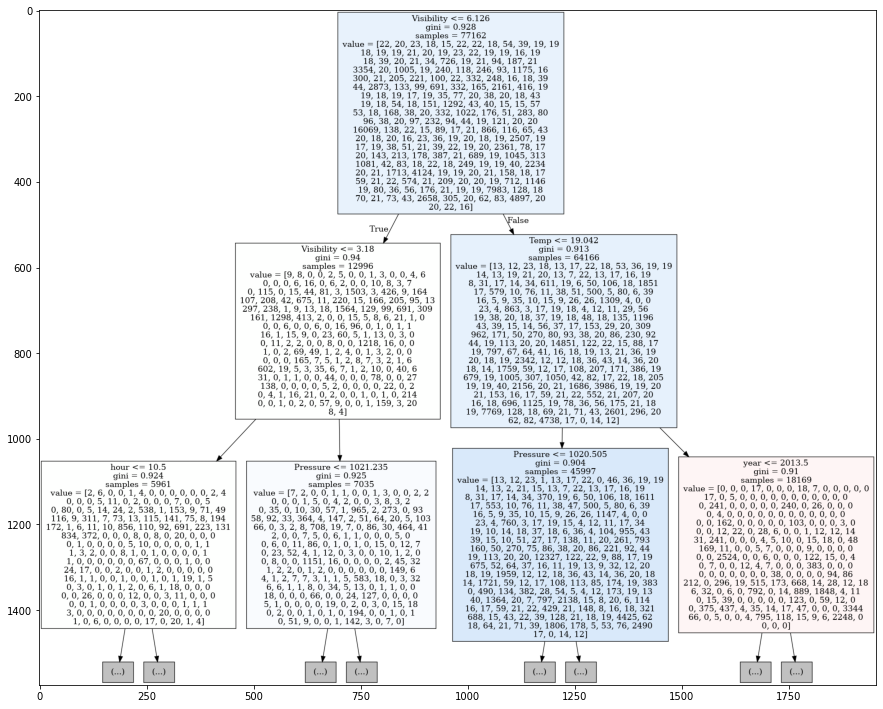

In [40]:
image = plt.imread('data.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

In [41]:
import pickle
pickle_file= open("weather.pkl", "wb") 
pickle.dump(dtree, pickle_file) 
pickle_file.close()